Name: Dhruvi Shah  
PSID: 2275310  
Github username: d-shah05

In [1]:
import pandas as pd # Package to read data files and store columns as a dataframe
import matplotlib.pyplot as plt # Package to support plots
import numpy as np # Package to support data types
import seaborn as sns # Package to support heatmap plots
from scipy.stats import zscore # Needed to perform z-score normalization

 Read data file winequality.csv

In [5]:
df=pd.read_csv("winequality.csv")

## Q1 - Summary Statistics

In [10]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Interpretations:

From the computed statistics, my two favorite are: 

1. The Mean  
    This is because for this particular dataset the mean helps us see the central tendency (what an average wine looks like, quality wise). For example, the mean alcohol content (~10.4%) tells us on average the typical alcohol content of red wine in this dataset, which helps us gain insights on what to expect in terms of wine characteristics.

2. The Standard Deviation  
    This measure shows us variability or how spread out the values are from the mean. This is important because it helps us determine which attributes are can be used as good predictors of wine quality. For example, alcohol has a higer standard deviation (~1.1%), indicating variability in wine strength. However, ph has a lower standard deviarion (~0.15), indicating less variability and consistency across wines. Understanding variability is important because attributes with higher variability (alcohol) can influence how wine quality is perceieved more strongly, as compared to attributes with lower variability (ph), which are less likely to be helpful in distinguishing good vs. bad wines. 

Together, mean and standard deviation help us understand both the *center* and the *spread* of the data, which is crucial for comparing wines and predicting quality.


## Q2 - Correlations

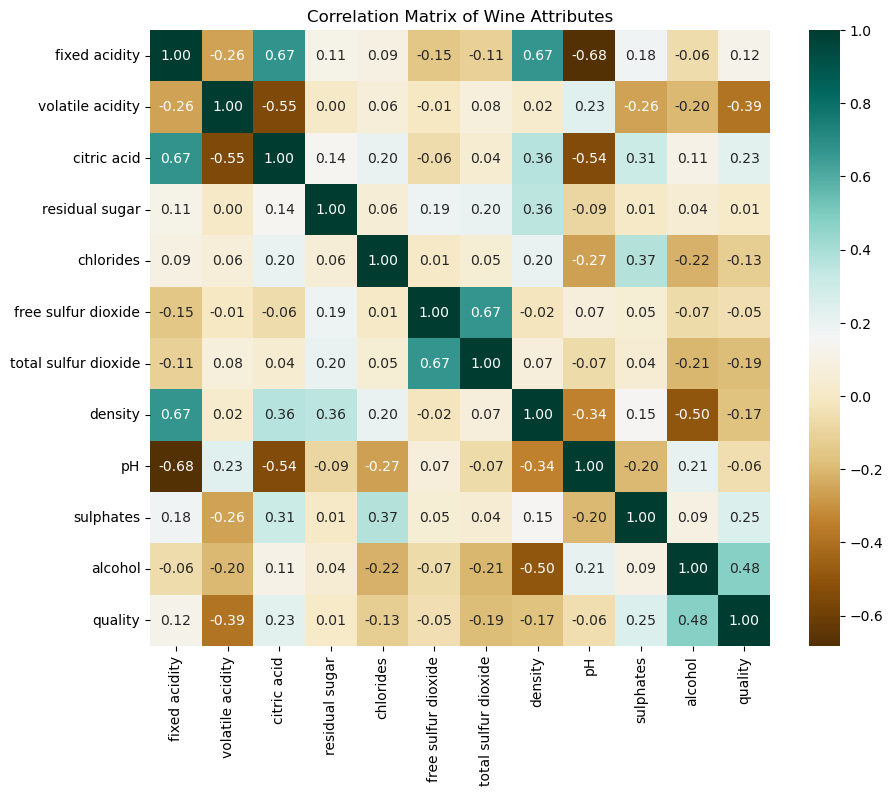

In [29]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="BrBG", fmt=".2f")
plt.title("Correlation Matrix of Wine Attributes")
plt.show()

#### Interpretations:
- The strongest postive correlation under the quality attribute is *Alcohol (0.48)*, which indicates that red wines with higher alcohol percentage tend to have better quality
- The strongest negative correlation under the quality attribute is *Volatile Acidity (0.39)*, which suggests that the higher the volatile acidity the more it reduces wine quality
- One of the strongest correlations seen overall is one between *Fixed Acidity* and *Citric Acid*. Both of these attrbutes have a strong positive correlation, indicatring that these acids often occur together. 
- Many the of other attributes (such as: residual sugar, pH, density) show weak or no correlation with quality.  

Overall this shows that alcohol and volatile acidity are the most influential predictors of perceived quality.  




## Q3 - Scatter Plot (Residual sugar vs. pH)

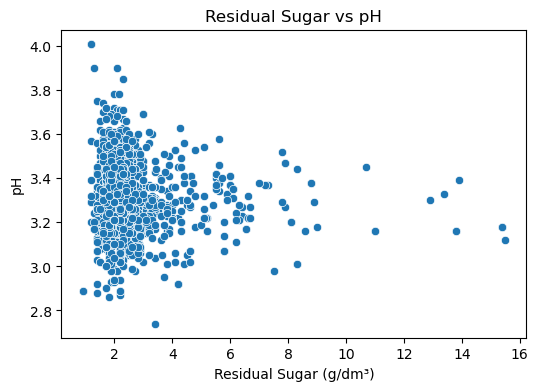

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="residual sugar", y="pH", data=df)
plt.title("Residual Sugar vs pH")
plt.xlabel("Residual Sugar (g/dm³)")
plt.ylabel("pH")
plt.show()

#### Interpretations:
- The scatter plot shows no strong linear trend.  
- Residual sugar values are tightly clustered (mostly < 6 g/dm³).  
- pH is also consistent around 3.2–3.4.  
- Because both variables show low variability and weak correlation, they are not strong predictors of quality.  

## Q4 - Scatterplot (Fixed acidity vs. Citric acid)

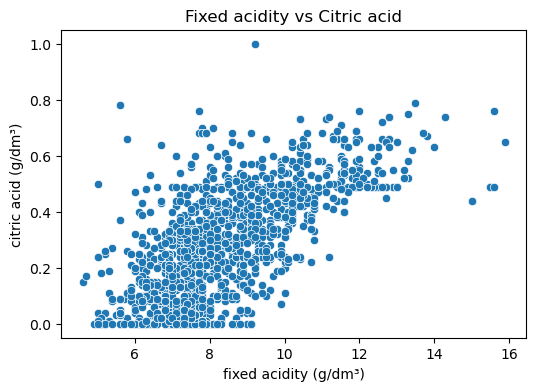

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="fixed acidity", y="citric acid", data=df)
plt.title("Fixed acidity vs Citric acid")
plt.xlabel("fixed acidity (g/dm³)")
plt.ylabel("citric acid (g/dm³)")
plt.show()

#### Interpretations:
- There is a positive trend: as fixed acidity increases, citric acid levels also tend to increase.
- However, the relationship is not perfectly linear. Instead, the data shows clusters:
    - Many wines have low citric acid (close to 0), regardless of fixed acidity.
    - For wines with higher citric acid, fixed acidity is usually also higher (most points concentrated between 6–12 g/dm³ fixed acidity).
- This suggests citric acid is sometimes absent (or very low), but when it is present, it usually accompanies higher fixed acidity.
- In practical terms, this relationship indicates chemical dependence (since citric acid contributes to overall acidity), but the variation shows that citric acid is not always used consistently in winemaking.

While fixed acidity and citric acid are related, citric acid values are often zero or low, so this attribute may not always be a reliable predictor of wine quality by itself.


## Q5 - Histogram

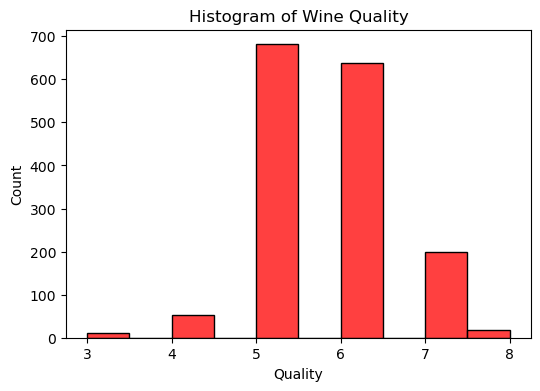

In [43]:
plt.figure(figsize=(6, 4))
sns.histplot(df["quality"], bins=10, color='red')
plt.title("Histogram of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

#### Interpretations:
- The histogram shows that most wines are rated 5–6, with very few at the extremes (3–4 or 8–9).
    - This indicates that the dataset is centered around moderate quality, with 'good' wines dominating the sample.
- The distribution is slightly skewed toward higher quality, but extreme high or low quality wines are rare.

Implications for modeling:

- Predictive models may perform well on the majority class (Good wines) but struggle with rare classes like Bad (low quality) or Very Good (high quality) wines.
- This imbalance may require techniques such as class weighting, resampling, or stratified sampling to ensure the model learns patterns for all quality levels

The histogram highlights that wine quality is mostly average, and extreme cases are rare, which is important to consider in both analysis and predictive modeling.

## Q6 - Boxplots

In [45]:
def quality_class(q):
    if q <= 4:
        return "Bad"
    elif q <= 7:
        return "Good"
    else:
        return "Very Good"

df["quality_class"] = df["quality"].apply(quality_class)


### Alcohol Box Plots

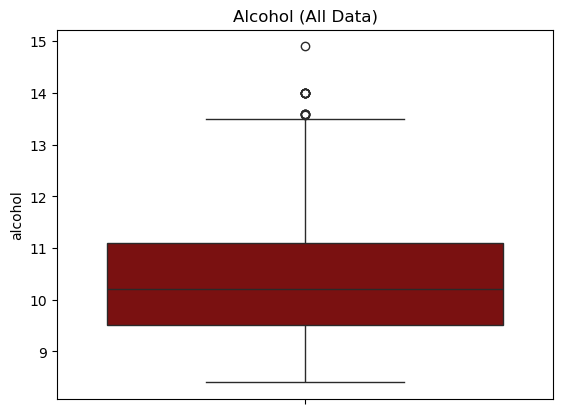

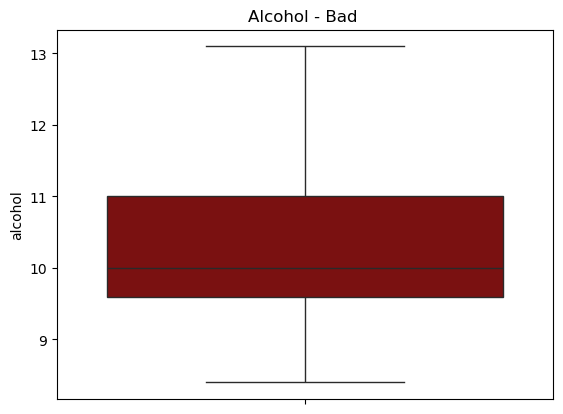

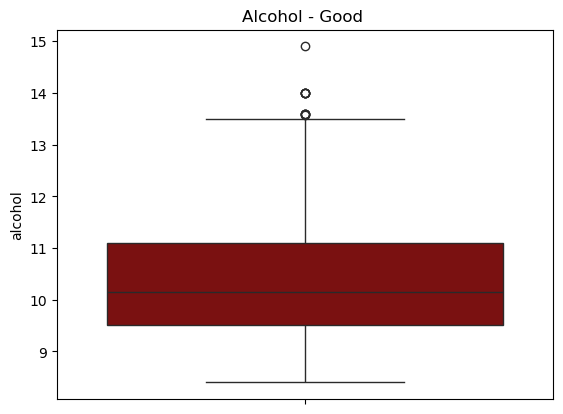

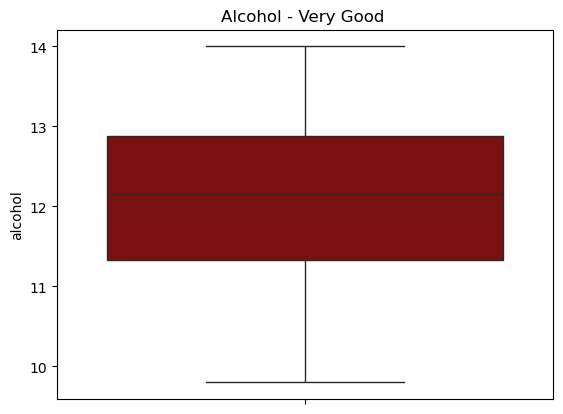

In [55]:
# All data
sns.boxplot(y=df["alcohol"], color="darkred")
plt.title("Alcohol (All Data)")
plt.show()

# Per class
for cls in ["Bad", "Good", "Very Good"]:
    sns.boxplot(y=df.loc[df["quality_class"]==cls, "alcohol"], color="darkred")
    plt.title(f"Alcohol - {cls} ")
    plt.show()

### pH Box Plots


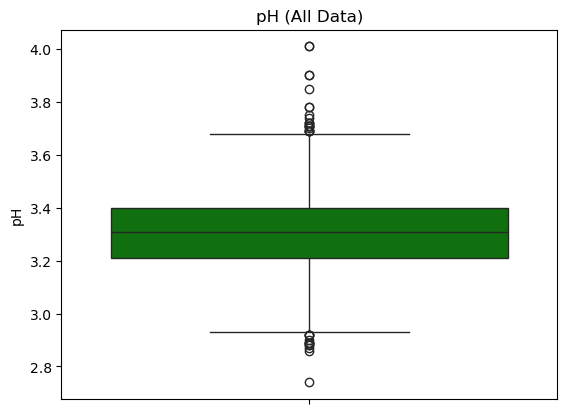

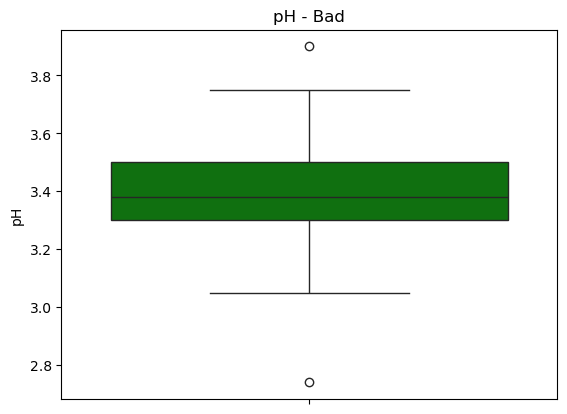

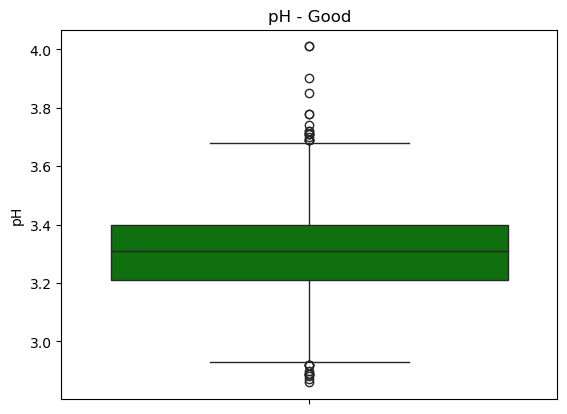

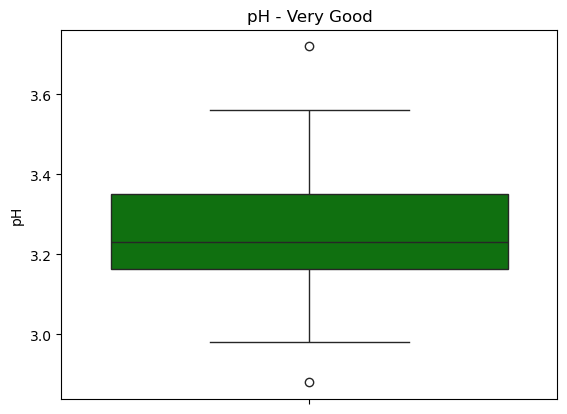

In [54]:
# All data
sns.boxplot(y=df["pH"], color="green")
plt.title("pH (All Data)")
plt.show()

# Per class
for cls in ["Bad", "Good", "Very Good"]:
    sns.boxplot(y=df.loc[df["quality_class"]==cls, "pH"], color="green")
    plt.title(f"pH - {cls}")
    plt.show()

### Alcohol vs pH Comparison


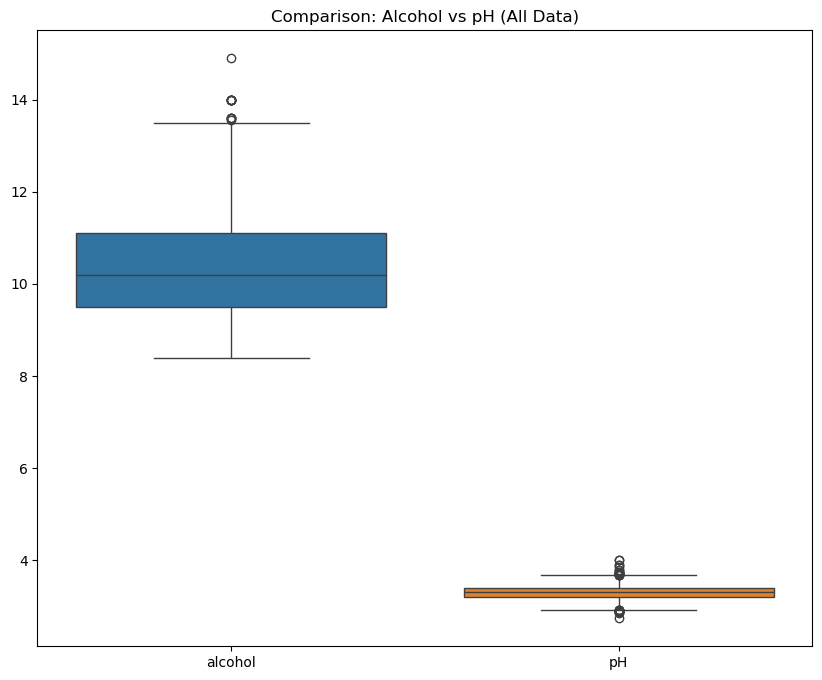

In [58]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[["alcohol", "pH"]])
plt.title("Comparison: Alcohol vs pH (All Data)")
plt.show()

#### Interpretations:

**1. Alcohol (All Wines)**
- Spread: ~8% to 14%, median ~10.4%.  
- **Bad wines:** Mostly at lower alcohol values (~8–10%), few outliers above 11%.  
- **Good wines:** Centered around the mean (~10–11%), more variability.  
- **Very Good wines:** Shift toward higher alcohol (~12%), with some extreme outliers up to 14%.  

Implications: 
- Alcohol is a **strong predictor** of wine quality.  
- Higher alcohol wines tend to score better, suggesting richness or intensity may influence perceived quality.  
- Outliers may indicate unusual blends or stylistic differences.  

**2. pH (All Wines)**
- Range: 2.7–4.0, median ~3.3.  
- Distribution is **narrow across all quality classes**, with slight variation.  

Implications:  
- pH is less useful for predicting quality.  
- Most wines cluster in a similar pH range, so other chemical features play a larger role.  

**3. Comparison: Alcohol vs. pH**
- Alcohol: Varies more and increases with quality → strong predictor.  
- pH: Stable across classes → weak predictor.  
- Even small differences in alcohol content may correspond to noticeable differences in quality.  
- Extreme outliers may represent exceptions worth further investigation.  

**Overall:**  
- Alcohol strongly correlates with wine quality, while pH remains largely consistent.  
- Understanding these patterns guides feature selection for predictive modeling and highlights which attributes may need further investigation.


## Q7 - Conclusion

From the summary statistics and visualizations, we can draw several key findings:

- **Central tendency:**  
  - The **mean quality** is ~5.6, with most wines clustered between 5–6 (histogram).  
  - This shows the dataset is imbalanced, with relatively few very high or very low-quality wines.  

- **Alcohol as a predictor:**  
  - Mean alcohol = **10.4%** with a std dev ≈ **1.1**.  
  - Box plots show that **Bad wines** have lower alcohol medians (~9.5%), **Good wines** are around the mean (~10.4%), and **Very Good wines** have the highest medians (~11%).  
  - This confirms that **alcohol is a strong positive indicator of quality**.  

- **pH stability:**  
  - Mean pH = **3.31**, std dev ≈ **0.15**.  
  - Across classes, pH medians are almost identical, with overlapping IQRs.  
  - This suggests pH is relatively stable and **not useful for predicting quality**.  

- **Correlations:**  
  - Quality correlates **positively** with alcohol (**r ≈ 0.48**) and sulphates (**r ≈ 0.25**).  
  - Quality correlates **negatively** with volatile acidity (**r ≈ -0.39**).  
  - These relationships align with wine chemistry: higher alcohol and sulphates tend to be perceived positively, while higher volatile acidity reduces perceived quality.  

**Final Insight:**  
Among the available attributes, **alcohol** shows the clearest statistical relationship with wine quality. Attributes like pH remain stable and are less useful predictors. This highlights how both measures of *center* (mean) and *spread* (standard deviation), as well as correlation, help us identify which features truly matter in predicting the perceived quality of red wine.
